     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0
['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]
you are looking at a muffin recipe!
[0]


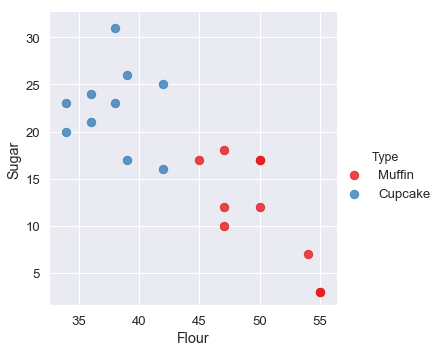

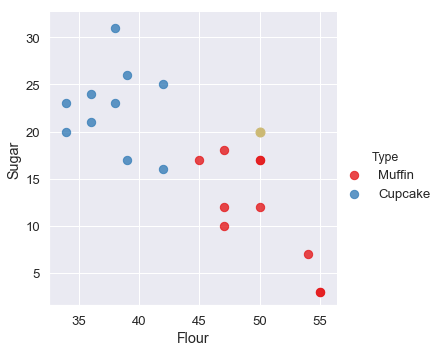

In [90]:
import pandas as pd
import numpy as np
from sklearn import svm

#for visuals
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(font_scale=1.2)
%matplotlib inline

#pickle package
#import pickle

recipes = pd.read_csv('muffinsVscupcakes.csv')
print(recipes.head())
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette="Set1", fit_reg=False, scatter_kws={"s": 70})

#pre-process the data
type_label = np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns[1:].tolist()
print(recipe_features)

#ingredients=recipes[recipe_features].values
ingredients=recipes[['Flour','Sugar']].values
print(ingredients)

#fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

sns.lmplot('Flour','Sugar', recipes, palette="Set1", fit_reg=False, hue='Type', scatter_kws = {"s":70})

#function that predicts if we have a muffin or a cake
def muffin_or_cupcake(flour, sugar):
    if model.predict([[flour, sugar]])==0:
        print('you are looking at a muffin recipe!')
    else:
        print('You are looking at a cupcake recipe!')
        
muffin_or_cupcake(50,20)
print(model.predict([[50, 20]]) )

plt.plot(50,20, 'yo', markersize='9')

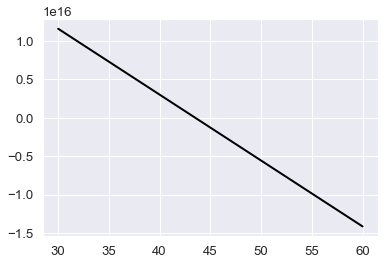